# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [26]:
# Load pickled data
import pickle

training_file = 'train.p'
validation_file= 'valid.p'
testing_file = 'test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

assert(len(X_train) == len(y_train))
assert(len(X_valid) == len(y_valid))
assert(len(X_test) == len(y_test))

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [27]:
import numpy as np

# Number of training examples
n_train = len(X_train)

# Number of validation examples.
n_valid = len(X_valid)

# Number of testing examples.
n_test = len(X_test)

# What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# How many unique classes/labels there are in the dataset.
n_classes = np.unique(y_train).size

print("Number of training examples =", n_train)
print("Number of validation examples =", n_valid)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of validation examples = 4410
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Let's randomly choose 5 traffic sign images from the training examples and plot them with their associated labels

Traffic sign label id for image 1 : 23
Traffic sign label id for image 2 : 11
Traffic sign label id for image 3 : 10
Traffic sign label id for image 4 : 5
Traffic sign label id for image 5 : 10


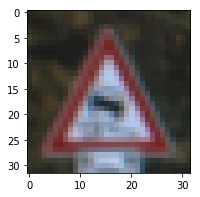

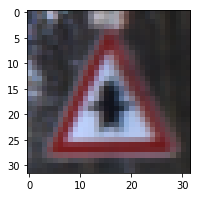

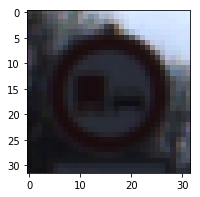

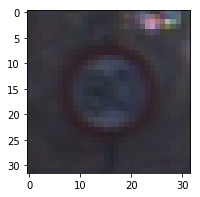

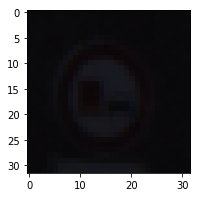

In [28]:
import random
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline

# Randomly display 5 images from the training examples
for i in range(5):
    index = random.randint(0, len(X_train))
    image = X_train[index].squeeze()
    plt.figure(figsize=(3,3))
    print("Traffic sign label id for image",i+1, ":", y_train[index])
    plt.imshow(image)

Plot the distribution of each traffic sign in the training/validation/test datasets

(array([  60.,  720.,  750.,  450.,  660.,  630.,  150.,  450.,  450.,
         480.,  660.,  420.,  690.,  720.,  270.,  210.,  150.,  360.,
         390.,   60.,   90.,   90.,  120.,  150.,   90.,  480.,  180.,
          60.,  150.,   90.,  150.,  270.,   60.,  210.,  120.,  390.,
         120.,   60.,  690.,   90.,   90.,   60.,   90.]),
 array([  0.        ,   0.97674419,   1.95348837,   2.93023256,
          3.90697674,   4.88372093,   5.86046512,   6.8372093 ,
          7.81395349,   8.79069767,   9.76744186,  10.74418605,
         11.72093023,  12.69767442,  13.6744186 ,  14.65116279,
         15.62790698,  16.60465116,  17.58139535,  18.55813953,
         19.53488372,  20.51162791,  21.48837209,  22.46511628,
         23.44186047,  24.41860465,  25.39534884,  26.37209302,
         27.34883721,  28.3255814 ,  29.30232558,  30.27906977,
         31.25581395,  32.23255814,  33.20930233,  34.18604651,
         35.1627907 ,  36.13953488,  37.11627907,  38.09302326,
         39.06976

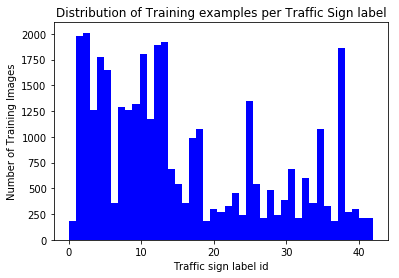

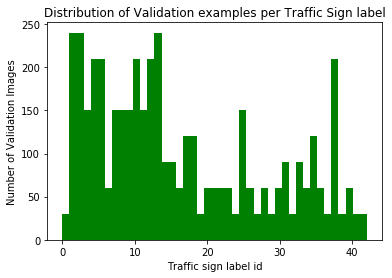

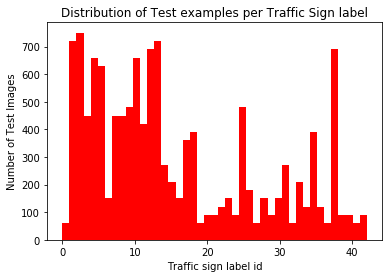

In [47]:
# Plot the distribution of each traffic sign label in the training dataset
plt.figure(1)
plt.xlabel('Traffic sign label id')
plt.ylabel('Number of Training Images')
plt.title('Distribution of Training examples per Traffic Sign label')
plt.hist(y_train, bins = n_classes,facecolor='blue')

# Plot the distribution of each traffic sign label in the validation dataset
plt.figure(2)
plt.xlabel('Traffic sign label id')
plt.ylabel('Number of Validation Images')
plt.title('Distribution of Validation examples per Traffic Sign label')
plt.hist(y_valid, bins = n_classes, facecolor='green')

# Plot the distribution of each traffic sign label in the test dataset
plt.figure(3)
plt.xlabel('Traffic sign label id')
plt.ylabel('Number of Test Images')
plt.title('Distribution of Test examples per Traffic Sign label')
plt.hist(y_test, bins = n_classes, facecolor='red')

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [30]:
import cv2

def grayscale(images):
    """ NOTE: to see the returned image as grayscale (assuming your grayscaled image is called 'gray'), 
        you should call plt.imshow(gray, cmap='gray') """
    grayscaled_images = []
    for image in images:
        grayscaled_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
        grayscaled_images.append(grayscaled_image)
    return np.array(grayscaled_images)

def normalize(images):
    normalized_images = []
    for image in images:
        normalized_image = (image.astype(np.float32)-128)/128
        normalized_images.append(normalized_image)
    return np.array(normalized_images)

def preprocess(images):
    preprocessed_images = grayscale(images)
    preprocessed_images = preprocessed_images[..., newaxis]
    preprocessed_images = normalize(images)
    preprocessed_images = preprocessed_images[..., newaxis]
    return preprocessed_images

In [31]:
### Preprocess the data here. Preprocessing steps could include normalization, converting to grayscale, etc.
from sklearn.utils import shuffle
from numpy import newaxis

# Shuffle the training data
X_train, y_train = shuffle(X_train, y_train)

# Grayscale images
X_train = grayscale(X_train)
X_train = X_train[..., newaxis]
X_valid = grayscale(X_valid)
X_valid = X_valid[..., newaxis]
X_test = grayscale(X_test)
X_test = X_test[..., newaxis]

Let's randomly choose 5 pre-processed traffic sign images and plot them, to visualize the effect of the pre-processing

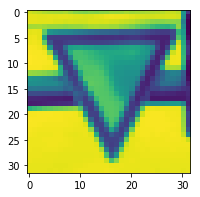

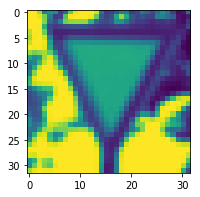

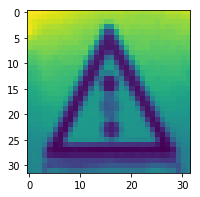

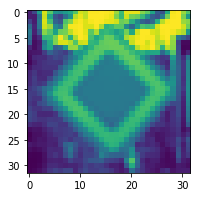

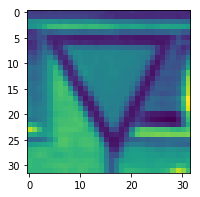

In [32]:
# Randomly display 5 images from the training examples after pre-processing
for i in range(5):
    index = random.randint(0, len(X_train))
    image = X_train[index].squeeze()
    plt.figure(figsize=(3,3))
    plt.imshow(image)

### Model Architecture

Implement the [LeNet-5](http://yann.lecun.com/exdb/lenet/) neural network architecture.

### Input
The LeNet architecture accepts a 32x32xC image as input, where C is the number of color channels.

### Architecture
**Layer 1: Convolutional.** The output shape should be 28x28x6.

**Activation.** Your choice of activation function.

**Pooling.** The output shape should be 14x14x6.

**Layer 2: Convolutional.** The output shape should be 10x10x16.

**Activation.** Your choice of activation function.

**Pooling.** The output shape should be 5x5x16.

**Flatten.** Flatten the output shape of the final pooling layer such that it's 1D instead of 3D. The easiest way to do is by using `tf.contrib.layers.flatten`, which is already imported for you.

**Layer 3: Fully Connected.** This should have 120 outputs.

**Activation.** Your choice of activation function.

**Layer 4: Fully Connected.** This should have 84 outputs.

**Activation.** Your choice of activation function.

**Layer 5: Fully Connected (Logits).** This should have 43 outputs.

### Output
Return the result of the 2nd fully connected layer.

In [33]:
import tensorflow as tf
from tensorflow.contrib.layers import flatten

EPOCHS = 101
BATCH_SIZE = 128

def LeNet(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    # Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x12.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 1, 12), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(12))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # Activation.
    conv1 = tf.nn.relu(conv1)
    
    # Dropout
    conv1 = tf.nn.dropout(conv1, keep_prob)

    # Pooling. Input = 28x28x12. Output = 14x14x12.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # Layer 2: Convolutional. Input = 14x14x12. Output = 10x10x24.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 12, 24), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(24))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # Activation.
    conv2 = tf.nn.relu(conv2)
    
    # Dropout
    conv2 = tf.nn.dropout(conv2, keep_prob)

    # Pooling. Input = 10x10x24. Output = 5x5x24.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # Flatten. Input = 5x5x24. Output = 600.
    fc0   = flatten(conv2)
    
    # Layer 3: Fully Connected. Input = 600. Output = 200.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(600, 200), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(200))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # Activation.
    fc1    = tf.nn.relu(fc1)
    
    # Dropout
    fc1 = tf.nn.dropout(fc1, keep_prob)

    # Layer 4: Fully Connected. Input = 200. Output = 100.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(200, 100), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(100))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    # Activation.
    fc2    = tf.nn.relu(fc2)
    
    # Dropout
    fc2 = tf.nn.dropout(fc2, keep_prob)

    # Layer 5: Fully Connected. Input = 100. Output = 43.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(100, 43), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    return logits

## Features and Labels
Train LeNet to classify Traffic Sign data.

`x` is a placeholder for a batch of input images.
`y` is a placeholder for a batch of output labels.

In [34]:
keep_prob = tf.placeholder(tf.float32)
x = tf.placeholder(tf.float32, (None, 32, 32, 1))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, 43)

## Training Pipeline
Create a training pipeline that uses the model to classify Traffic Sign data.

In [35]:
rate = 0.0003

logits = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

## Model Evaluation
Evaluate how well the loss and accuracy of the model for a given dataset.

In [36]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 1.})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

## Train the Model
Run the training data through the training pipeline to train the model.

Before each epoch, shuffle the training set.

After each epoch, measure the loss and accuracy of the validation set.

Save the model after training.

In [37]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    
    training_accuracies = []
    validation_accuracies = []
    epoch_index = []
    for i in range(EPOCHS):
        epoch_index.append(i)
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 0.75})

        training_accuracy = evaluate(X_train, y_train)
        training_accuracies.append(training_accuracy)
        validation_accuracy = evaluate(X_valid, y_valid)
        validation_accuracies.append(validation_accuracy)
        
        # Print training and validation accuracy every (step) number of epochs
        step = 10
        if i % step == 0:
            print("EPOCH {} ...".format(i+1))
            print("Training Accuracy = {:.3f}".format(training_accuracy))
            print("Validation Accuracy = {:.3f}".format(validation_accuracy))
            print()
        
    saver.save(sess, './lenet')
    print("Model saved")

Training...

EPOCH 1 ...
Training Accuracy = 0.064
Validation Accuracy = 0.061

EPOCH 11 ...
Training Accuracy = 0.643
Validation Accuracy = 0.595

EPOCH 21 ...
Training Accuracy = 0.896
Validation Accuracy = 0.827

EPOCH 31 ...
Training Accuracy = 0.968
Validation Accuracy = 0.905

EPOCH 41 ...
Training Accuracy = 0.988
Validation Accuracy = 0.921

EPOCH 51 ...
Training Accuracy = 0.996
Validation Accuracy = 0.928

EPOCH 61 ...
Training Accuracy = 0.998
Validation Accuracy = 0.946

EPOCH 71 ...
Training Accuracy = 0.999
Validation Accuracy = 0.954

EPOCH 81 ...
Training Accuracy = 1.000
Validation Accuracy = 0.954

EPOCH 91 ...
Training Accuracy = 1.000
Validation Accuracy = 0.951

EPOCH 101 ...
Training Accuracy = 1.000
Validation Accuracy = 0.960

Model saved


### Plot a graph of the Training and Validation accuracies at each epoch

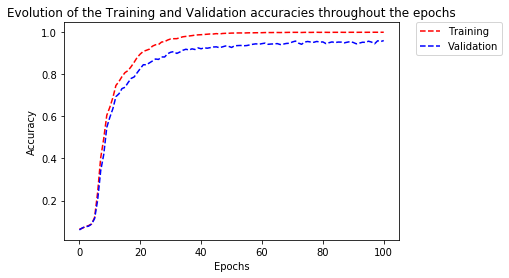

In [38]:
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Evolution of the Training and Validation accuracies throughout the epochs')
plt.plot(epoch_index, training_accuracies, 'r--', label="Training")
plt.plot(epoch_index, validation_accuracies, 'b--', label="Validation")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

## Evaluate the Model
Once you are completely satisfied with your model, evaluate the performance of the model on the test set.

Be sure to only do this once!

If you were to measure the performance of your trained model on the test set, then improve your model, and then measure the performance of your model on the test set again, that would invalidate your test results. You wouldn't get a true measure of how well your model would perform against real data.

You do not need to modify this section.

In [39]:
with tf.Session() as sess:
    saver.restore(sess, './lenet')
 
    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Test Accuracy = 0.950


---

## Step 3: Test a Model on New Images

Here, I've downloaded 5 pictures of German traffic signs from the web and used my model to predict the traffic sign type.

You may find the file `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images Pulled from the Web

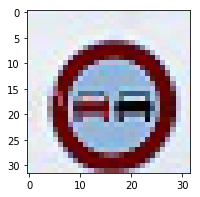

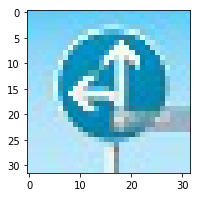

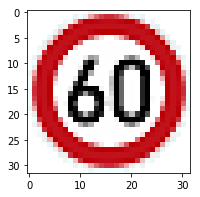

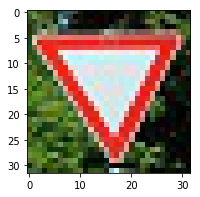

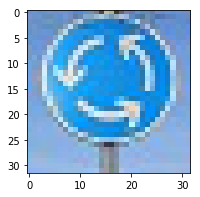

In [40]:
import os
import matplotlib.image as mpimg

# Put the file name of all the images from the web in an array
images_name = os.listdir("traffic-signs-from-web/")

for image_name in images_name:
    image = mpimg.imread('traffic-signs-from-web/' + image_name)
    plt.figure(figsize=(3,3))
    plt.imshow(image)

In [41]:
# Create an array of IDs associated with the traffic sign images pulled from the web
y_web = []
y_web.append(9)  # Image 1 from the web is a "No passing" traffic sign, which has a ClassId = 9
y_web.append(37) # Image 2 from the web is a "Go straight or left" traffic sign, which has a ClassId = 37
y_web.append(3)  # Image 3 from the web is a "Speed limit (60km/h)" traffic sign, which has a ClassId = 3
y_web.append(13) # Image 4 from the web is a "Yield" traffic sign, which has a ClassId = 13
y_web.append(40) # Image 5 from the web is a "Roundabout mandatory" traffic sign, which has a ClassId = 40

print("y_web =", y_web)

y_web = [9, 37, 3, 13, 40]


### Predict the Sign Type for Each Image Pulled from the Web

In [42]:
# Put images from web in an array
x_web = []
for image_name in images_name:
    image_web = mpimg.imread('traffic-signs-from-web/' + image_name)
    x_web.append(image_web)
    
# Pre-process images from web
x_web = grayscale(x_web)
x_web = x_web[..., newaxis]


with tf.Session() as sess:
    
    sess.run(tf.global_variables_initializer())
    saver.restore(sess, './lenet')
    
    softmax = tf.nn.softmax(logits)
    images_probabilities = sess.run(softmax, feed_dict={x: x_web, keep_prob : 1.0})
    # print("Probability of being associated to each class for each web image: ", images_probabilities)    
    
    # Get predicted traffic sign id
    pred_web = []
    for image_probabilities in images_probabilities:
        # get index of max probability
        max_probability_index = np.where(image_probabilities == image_probabilities.max())
        pred_web.append(max_probability_index[0][0])
    print("pred_web =", pred_web)

pred_web = [9, 37, 2, 13, 12]


### Analyze Performance

In [43]:
### Calculate the accuracy for these 5 new images. 

with tf.Session() as sess:
    
    sess.run(tf.global_variables_initializer())
    saver.restore(sess, './lenet')
    
    accuracy_web = evaluate(x_web, y_web)
    print("Accuracy on images from the web = {:.3f}".format(accuracy_web))

Accuracy on images from the web = 0.600


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the web images, we'll print out the model's top 5 softmax probabilities to show the **certainty** of the model's predictions.

In [118]:
with tf.Session() as sess:
    top_how_many = 5
    topK_images_probabilities = sess.run(tf.nn.top_k(tf.constant(images_probabilities), k=top_how_many))
          
    for i in range(len(images_name)):
        print("Image", i+1,"from web:", images_name[i])
        topK_image_probabilities = np.around(topK_images_probabilities.values[i], decimals=5)
        topK_image_IDs = topK_images_probabilities.indices[i]
        for j in range(top_how_many):
            print("\t Predicted Class Id =", topK_image_IDs[j], "with probability", topK_image_probabilities[j])   
        print("\n")

Image 1 from web: no-passing.jpg
	 Predicted Class Id = 9 with probability 1.0
	 Predicted Class Id = 16 with probability 0.0
	 Predicted Class Id = 12 with probability 0.0
	 Predicted Class Id = 15 with probability 0.0
	 Predicted Class Id = 19 with probability 0.0


Image 2 from web: go-straight-or-left.jpg
	 Predicted Class Id = 37 with probability 0.9976
	 Predicted Class Id = 35 with probability 0.00206
	 Predicted Class Id = 38 with probability 0.00029
	 Predicted Class Id = 26 with probability 4e-05
	 Predicted Class Id = 40 with probability 0.0


Image 3 from web: 60-speed-limit.jpg
	 Predicted Class Id = 2 with probability 0.56688
	 Predicted Class Id = 1 with probability 0.26644
	 Predicted Class Id = 3 with probability 0.1643
	 Predicted Class Id = 37 with probability 0.00091
	 Predicted Class Id = 5 with probability 0.00059


Image 4 from web: yield.jpg
	 Predicted Class Id = 13 with probability 1.0
	 Predicted Class Id = 35 with probability 0.0
	 Predicted Class Id = 12 wi

---

## Step 4: Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [ ]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it maybe having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")

### Question 9

Discuss how you used the visual output of your trained network's feature maps to show that it had learned to look for interesting characteristics in traffic sign images


**Answer:**

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 